# **GRIP TASK 4**
# EDA (TERRORISM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


***Load the dataset:***

In [ ]:
file = '/globalterrorism.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181688,2.017120e+11,2017.0,12.0,31.0,NaN,0.0,NaN,182.0,Somalia,11.0,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
181689,2.017120e+11,2017.0,12.0,31.0,NaN,0.0,NaN,200.0,Syria,10.0,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9.0,-9.0,1.0,1.0,NaN
181690,2.017120e+11,2017.0,12.0,31.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0.0,0.0,0.0,0.0,NaN
181691,2.017120e+11,2017.0,12.0,31.0,NaN,0.0,NaN,92.0,India,6.0,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN


***Data Cleaning:***

In [ ]:
df.columns.nunique()

135

***Fetch the required columns to the new dataset:***

In [110]:
data = df[['Year','Month','Day','City','State','Region','Country','Target_Type','Target_Sub-Type','Attack_Type','Gang_Name', 'Weapon_Type']]
data

,Year,Month,Day,City,State,Region,Country,Target_Type,Target_Sub-Type,Attack_Type,Gang_Name,Weapon_Type
0,1970.0,7.0,2.0,Santo Domingo,NaN,Central America & Caribbean,Dominican Republic,Private Citizens & Property,Named Civilian,Assassination,MANO-D,Unknown
1,1970.0,0.0,0.0,Mexico city,Federal,North America,Mexico,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Hostage Taking (Kidnapping),23rd of September Communist League,Unknown
2,1970.0,1.0,0.0,Unknown,Tarlac,Southeast Asia,Philippines,Journalists & Media,Radio Journalist/Staff/Facility,Assassination,Unknown,Unknown
3,1970.0,1.0,0.0,Athens,Attica,Western Europe,Greece,Government (Diplomatic),Embassy/Consulate,Bombing/Explosion,Unknown,Explosives
4,1970.0,1.0,0.0,Fukouka,Fukouka,East Asia,Japan,Government (Diplomatic),Embassy/Consulate,Facility/Infrastructure Attack,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181688,2017.0,12.0,31.0,Ceelka Geelow,Middle Shebelle,Sub-Saharan Africa,Somalia,Military,Military Checkpoint,Armed Assault,Al-Shabaab,Firearms
181689,2017.0,12.0,31.0,Jableh,Lattakia,Middle East & North Africa,Syria,Military,Military Barracks/Base/Headquarters/Checkpost,Bombing/Explosion,Muslim extremists,Explosives
181690,2017.0,12.0,31.0,Kubentog,Maguindanao,Southeast Asia,Philippines,Private Citizens & Property,House/Apartment/Residence,Facility/Infrastructure Attack,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181691,2017.0,12.0,31.0,Imphal,Manipur,South Asia,India,Government (General),Government Building/Facility/Office,Bombing/Explosion,Unknown,Explosives


In [27]:
data.shape

(181693, 12)

In [28]:
data.info

<bound method DataFrame.info of           Year  Month   Day           City            State  \
0       1970.0    7.0   2.0  Santo Domingo              NaN   
1       1970.0    0.0   0.0    Mexico city          Federal   
2       1970.0    1.0   0.0        Unknown           Tarlac   
3       1970.0    1.0   0.0         Athens           Attica   
4       1970.0    1.0   0.0        Fukouka          Fukouka   
...        ...    ...   ...            ...              ...   
181688  2017.0   12.0  31.0  Ceelka Geelow  Middle Shebelle   
181689  2017.0   12.0  31.0         Jableh         Lattakia   
181690  2017.0   12.0  31.0       Kubentog      Maguindanao   
181691  2017.0   12.0  31.0         Imphal          Manipur   
181692  2017.0   12.0  31.0  Cotabato City      Maguindanao   

                             Region             Country  \
0       Central America & Caribbean  Dominican Republic   
1                     North America              Mexico   
2                    Southeast Asi

In [29]:
data.describe()

,Year,Month,Day
count,1.816930e+05,181691.000000,181691.000000
mean,2.217889e+06,6.467277,15.505644
std,6.678837e+08,3.388303,8.814045
min,1.970000e+03,0.000000,0.000000
25%,1.991000e+03,4.000000,8.000000
50%,2.009000e+03,6.000000,15.000000
75%,2.014000e+03,9.000000,23.000000
max,2.016070e+11,12.000000,31.000000


In [30]:
data.isnull().sum()

Year                   0
Month                  2
Day                    2
City                 436
State                423
Region                 2
Country                2
Target_Type            2
Target_Sub-Type    10375
Attack_Type            2
Gang_Name              2
Weapon_Type            2
dtype: int64

In [105]:
data['Month'] = data['Month'].fillna(0)
data['Day'] = data['Day'].fillna(0)
data['City'] = data['City'].fillna('Unknown')
data['State'] = data['State'].fillna('Unknown')
data['Region'] = data['Region'].fillna('Unknown')
data['Country'] = data['Country'].fillna('Unknown')
data['Target_Type'] = data['Target_Type'].fillna('Unknown')
data['Target_Sub-Type'] = data['Target_Sub-Type'].fillna('Unknown')
data['Attack_Type'] = data['Attack_Type'].fillna('Unknown')
data['Gang_Name'] = data['Gang_Name'].fillna('Unknown')
data['Weapon_Type'] = data['Weapon_Type'].fillna('Unknown')
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Year,Month,Day,City,State,Region,Country,Target_Type,Target_Sub-Type,Attack_Type,Gang_Name,Weapon_Type
0,1970.0,7.0,2.0,Santo Domingo,Unknown,Central America & Caribbean,Dominican Republic,Private Citizens & Property,Named Civilian,Assassination,MANO-D,Unknown
1,1970.0,0.0,0.0,Mexico city,Federal,North America,Mexico,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Hostage Taking (Kidnapping),23rd of September Communist League,Unknown
2,1970.0,1.0,0.0,Unknown,Tarlac,Southeast Asia,Philippines,Journalists & Media,Radio Journalist/Staff/Facility,Assassination,Unknown,Unknown
3,1970.0,1.0,0.0,Athens,Attica,Western Europe,Greece,Government (Diplomatic),Embassy/Consulate,Bombing/Explosion,Unknown,Explosives
4,1970.0,1.0,0.0,Fukouka,Fukouka,East Asia,Japan,Government (Diplomatic),Embassy/Consulate,Facility/Infrastructure Attack,Unknown,Incendiary


In [32]:
data.isnull().sum()

Year               0
Month              0
Day                0
City               0
State              0
Region             0
Country            0
Target_Type        0
Target_Sub-Type    0
Attack_Type        0
Gang_Name          0
Weapon_Type        0
dtype: int64

***Explore the Dataset***

In [44]:
data['Country'].nunique()

206

In [42]:
data['City'].nunique()

36674

In [41]:
data['Gang_Name'].nunique()

3537

In [49]:
data['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia', 'Unknown'],
      dtype=object)

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia', 'Unknown'],
      dtype=object)

In [45]:
data['Target_Type'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [46]:
data['Attack_Type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [47]:
data['Weapon_Type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

# ***Top 20 affected Countries:***

In [116]:
pd.DataFrame(data['Country'].value_counts().head(20))

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


# ***Top 20 affected States***

In [83]:
pd.DataFrame(data['State'].value_counts().head(20))

,State
Baghdad,7645
Unknown,4713
Northern Ireland,4498
Balochistan,3710
Saladin,3411
Al Anbar,3299
Nineveh,3241
Sindh,3206
Khyber Pakhtunkhwa,3084
Diyala,3041


# ***Top 20 affected Cities:***

In [84]:
pd.DataFrame(data['City'].value_counts().head(20))

,City
Unknown,10211
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


# ***Top 20 affected Region:***

In [85]:
pd.DataFrame(data['Region'].value_counts().head(20))

,Region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


# ***Most Dangerous and leading 20 Terrorist Gangs:***

In [86]:
pd.DataFrame(data['Gang_Name'].value_counts().head(20))

,Gang_Name
Unknown,82784
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


# ***Top 20 Target Types:***

In [89]:
pd.DataFrame(data['Target_Type'].value_counts().head(20))

,Target_Type
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Unknown,5900
Religious Figures/Institutions,4440
Educational Institution,4322


# ***Total Weapons:***

In [90]:
pd.DataFrame(data['Weapon_Type'].value_counts())

,Weapon_Type
Explosives,92426
Firearms,58524
Unknown,15159
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114
Biological,35


# ***Total Mode of Attack:***

In [88]:
pd.DataFrame(data['Attack_Type'].value_counts())

,Attack_Type
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7278
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


# ***Attack modes with respect to the Region:***

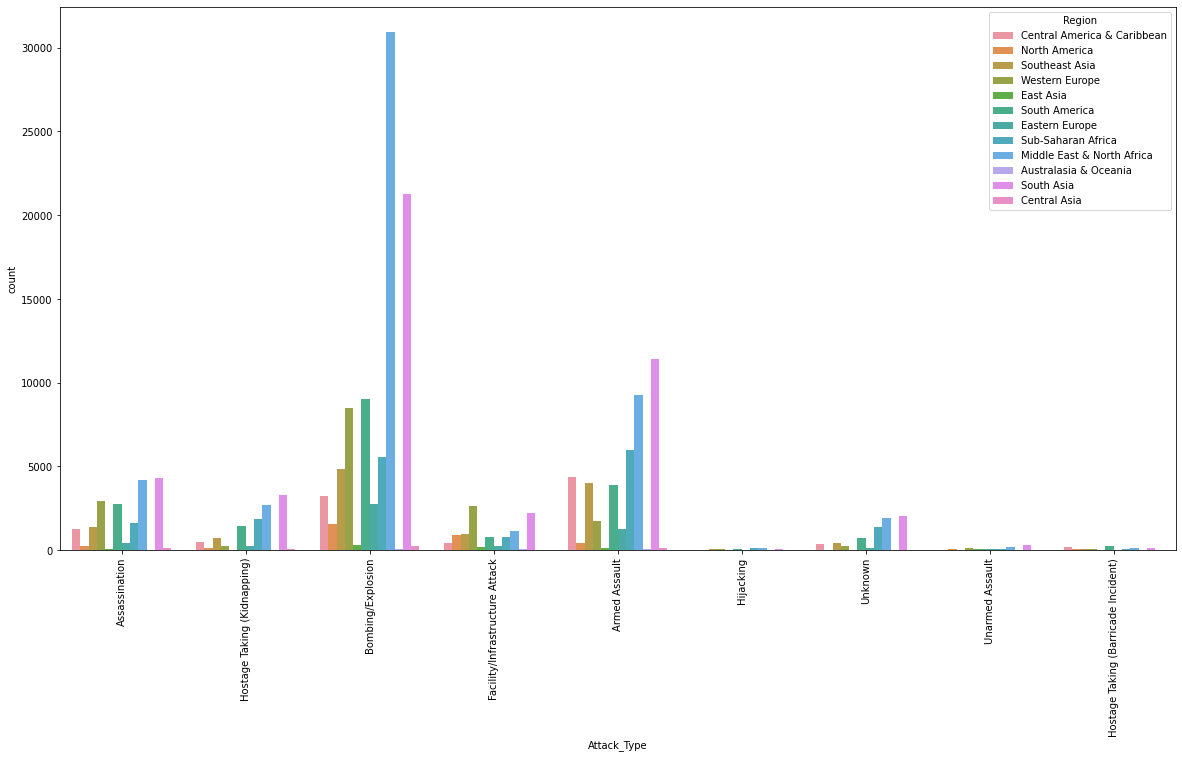

In [118]:
plt.figure(figsize=(20,10))
sb.countplot(x='Attack_Type',hue='Region',data=data)
plt.xticks(rotation=90)
plt.show()

Most familiar attack mode is Bombing/Explosion and the least mode is Hijacking. The most affected bombing/explosion region is Middle East and North africa.

# ***Familiar Weapons used for the attacks according to the region:***

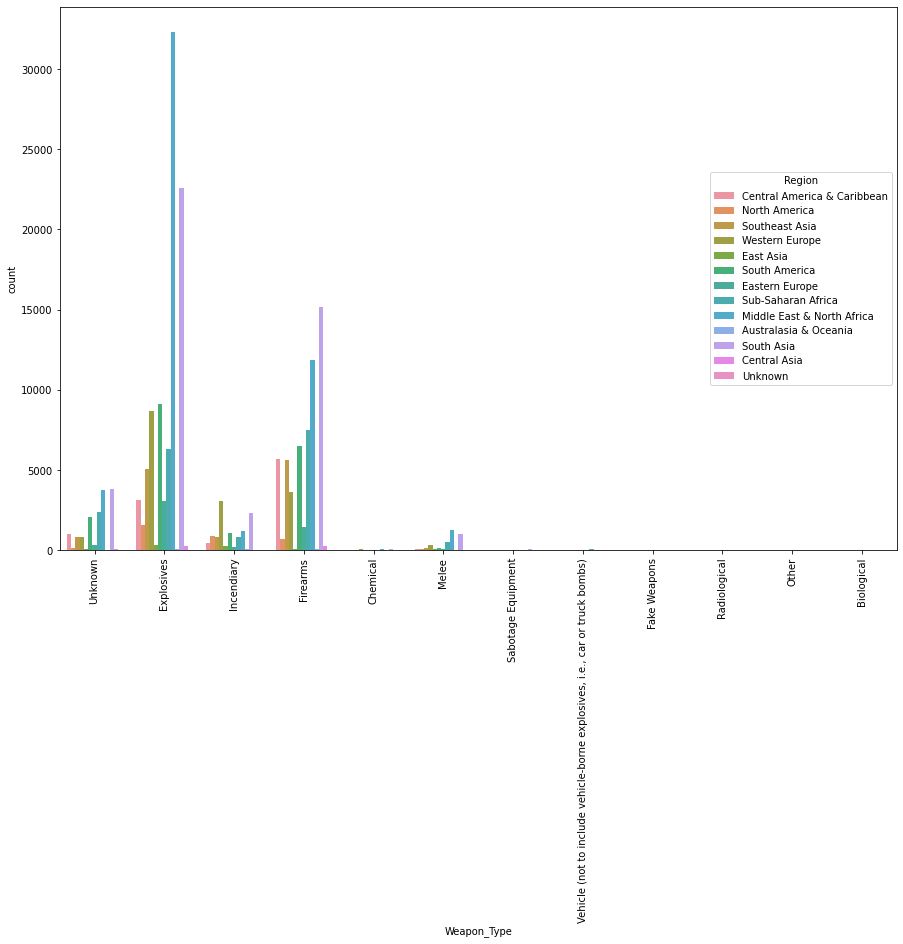

In [104]:
plt.figure(figsize=(15,10))
sb.countplot(x='Weapon_Type',hue='Region',data=data)
plt.xticks(rotation=90)
plt.legend(title='Region',loc='right')
plt.show()

The familiar weapon for attacks is Explosives and then firearms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


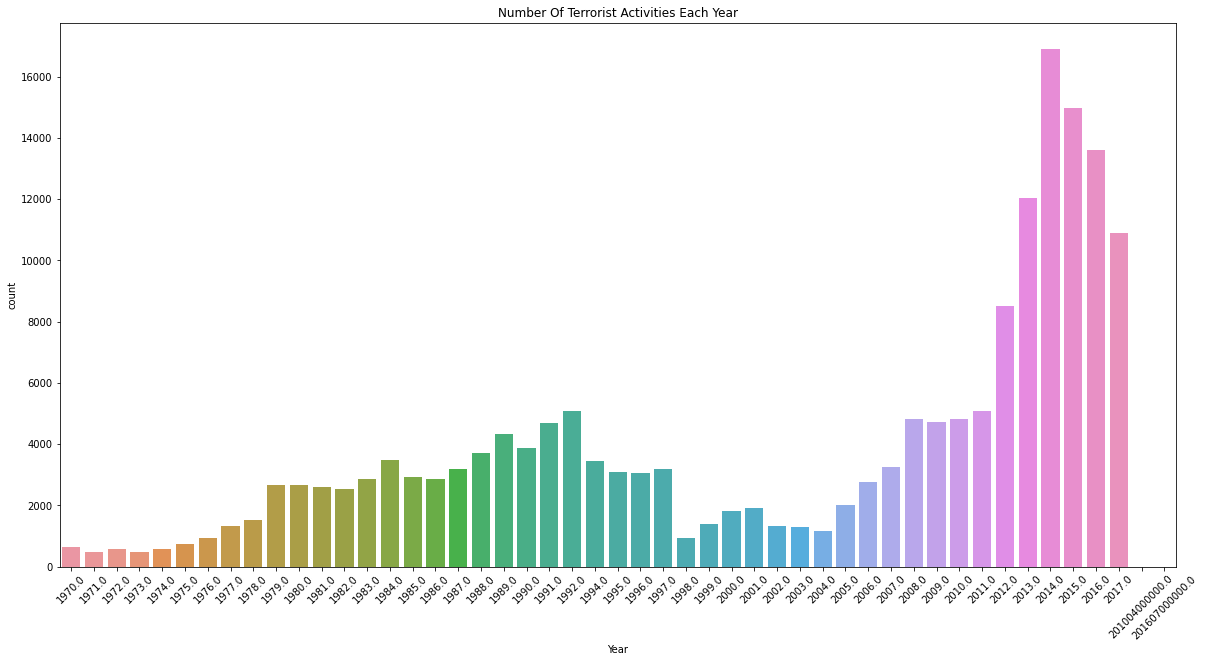

In [113]:
plt.subplots(figsize=(20,10))
sb.countplot('Year',data=data)
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Highest Terrorist attack occurs in the year of 2014 and attacks gradually increases from 2012 to 2014 then decreases from 2015 to 2017.

# ***Analysis Result:***

Taliban is the most dangerous gang.

There has been a gradual increase in Terror Activities since 2004.

Highest number of terror activities occurred in the year 2014.

After 2014 the terror activities started to decrease.

Mostly there is usage of Explosives and Firearms as Weapons and the least mode is Hijacking. 

The most affected bombing/explosion region is Middle East and North africa.


# ***Prevention of attacks:***
By reducing access to dangerous weapons.

Government should provide more security over countries and should take measures on increased immigrations.

Security should be strengthened across borders.
